# MODIS Chla surface from 2002 - 2019 
 
The links to the data:  
* https://oceancolor.gsfc.nasa.gov/l3/order/
* this is after using Benny's script to condense it 

# Regrid
### we first have to regrid MODIS output to a 180 by 360 grid, I did this in the terminal, for every month, but an example of a month is right here. 
* ncatted -a coordinates,chlor_a,c,c,"lon lat" PAR_Climatology_Jan.nc
* cdo remapbil,r360x180 -selname,chlor_a PAR_Climatology_Jan.nc PAR_Climatology_Jan_out.nc
* cdo sellonlatbox,-180,180,-89.5,89.5 PAR_Climatology_Jan_out.nc PAR_Climatology_Jan_remapgrid.nc

In [1]:
%matplotlib inline
import warnings
warnings.simplefilter("ignore") # Silence warnings
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import hvplot.xarray
import xarray as xr
import cartopy
import cartopy.crs as ccrs
import numpy as np
from matplotlib.pyplot import figure
import pylab 
from cartopy.util import add_cyclic_point

# Scientific libraries
from numpy import arange,array,ones
from scipy import stats

import scipy.io as sio
import pandas as pd
import matplotlib.cm as cm
import glob
import matplotlib.colors as colors

In [2]:
ds7 = xr.open_dataset('modis/PAR_Climatology_Jul_remapgrid.nc', decode_times=False)
ds8 = xr.open_dataset('modis/PAR_Climatology_Aug_remapgrid.nc', decode_times=False)
ds9 = xr.open_dataset('modis/PAR_Climatology_Sep_remapgrid.nc', decode_times=False)
ds10 = xr.open_dataset('modis/PAR_Climatology_Oct_remapgrid.nc', decode_times=False)
ds11 = xr.open_dataset('modis/PAR_Climatology_Nov_remapgrid.nc', decode_times=False)
ds12 = xr.open_dataset('modis/PAR_Climatology_Dec_remapgrid.nc', decode_times=False)
ds1 = xr.open_dataset('modis/PAR_Climatology_Jan_remapgrid.nc', decode_times=False)
ds2 = xr.open_dataset('modis/PAR_Climatology_Feb_remapgrid.nc', decode_times=False)
ds3 = xr.open_dataset('modis/PAR_Climatology_Mar_remapgrid.nc', decode_times=False)
ds4 = xr.open_dataset('modis/PAR_Climatology_Apr_remapgrid.nc', decode_times=False)
ds5 = xr.open_dataset('modis/PAR_Climatology_May_remapgrid.nc', decode_times=False)
ds6 = xr.open_dataset('modis/PAR_Climatology_Jun_remapgrid.nc', decode_times=False)

In [9]:
Chla_surf_obs = np.concatenate([ds1.chlor_a,ds2.chlor_a,ds3.chlor_a,ds4.chlor_a,
                            ds5.chlor_a,ds6.chlor_a,ds7.chlor_a,ds8.chlor_a,
                            ds9.chlor_a,ds10.chlor_a,ds11.chlor_a,ds12.chlor_a], axis =0)

In [2]:
ds = xr.open_dataset('/glade/work/gabyn/MARBL_spectra/remapgrid.out1.nc')
chla_model = np.nansum(np.stack([ds.ppChl, ds.mp1Chl, ds.diazChl, ds.diat1Chl, ds.mp2Chl, ds.diat2Chl, ds.mp3Chl, ds.diat3Chl, ds.mp4Chl]), axis =0)
chla_model[chla_model<=0]=np.nan

## the colorbar that I used before 
norm=colors.LogNorm(vmin=0.01, vmax=1),cmap=cm.nipy_spectral

In [11]:
chla_surf_avg_model = np.nanmean(chla_model[:,0,:,:], axis = 0)
chla_surf_avg_obs = np.nanmean(Chla_surf_obs, axis = 0)
chla_diff = chla_surf_avg_model-chla_surf_avg_obs
chla_diff_norm = (chla_diff)/chla_surf_avg_obs

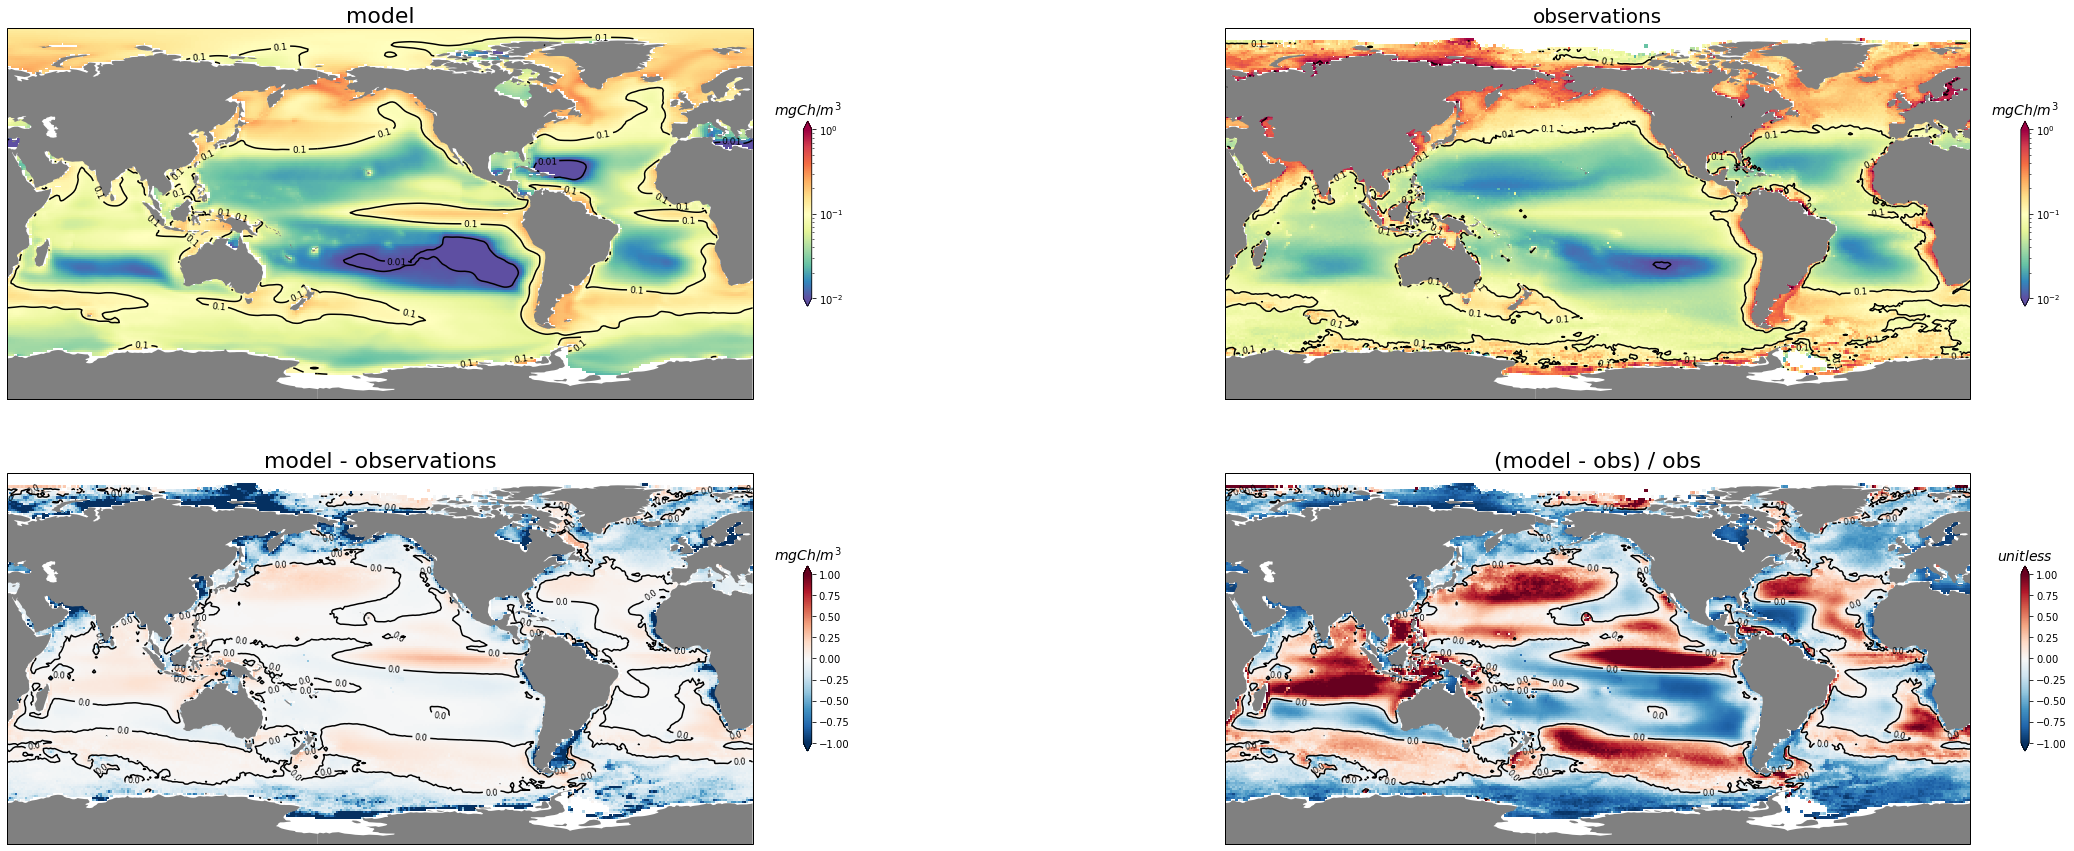

In [16]:
fig = plt.figure(figsize=(40, 15))
lat = ds.lat

# Temperature model
ax = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree(central_longitude=210.0))
phyto, lon = add_cyclic_point(np.log10(chla_surf_avg_model+1), coord=ds.lon, axis=1)
cf = ax.pcolor(lon, lat, phyto, cmap='Spectral_r',
               transform=ccrs.PlateCarree(),norm=colors.LogNorm(vmin=0.01, vmax=1))
cs = ax.contour(lon, lat, phyto, levels =[0.01, 0.1, 1],colors='k', transform=ccrs.PlateCarree())
lb = plt.clabel(cs, fontsize=9, inline=True, fmt='%r',inline_spacing=5);
land = ax.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax.set_title('model', fontsize = 22)
cbar = plt.colorbar(cf,shrink =0.5,extend = 'both')
cbar.ax.set_title('$mg Ch$/$m^3$', fontsize = 14)

# temperature observations 
ax1 = fig.add_subplot(2, 2, 2, projection=ccrs.PlateCarree(central_longitude=210.0))
phyto, lon = add_cyclic_point(np.log10(chla_surf_avg_obs+1), coord=ds.lon, axis=1)
cf = ax1.pcolor(lon, lat, phyto, cmap='Spectral_r',
                transform=ccrs.PlateCarree(),norm=colors.LogNorm(vmin=0.01, vmax=1))
cs = ax1.contour(lon, lat, phyto, levels =[0.01, 0.1, 1],colors='k', transform=ccrs.PlateCarree())
lb = plt.clabel(cs, fontsize=9, inline=True, fmt='%r',inline_spacing=5);
land = ax1.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax1.set_title('observations', fontsize = 20)
cbar = plt.colorbar(cf,shrink =0.5,extend = 'both')
cbar.ax.set_title('$mg Ch$/$m^3$', fontsize = 14)

# model - observations  
ax2 = fig.add_subplot(2, 2, 3, projection=ccrs.PlateCarree(central_longitude=210.0))
phyto, lon = add_cyclic_point(chla_diff, coord=ds.lon, axis=1)
cf = ax2.pcolor(lon, lat, phyto, cmap='RdBu_r',transform=ccrs.PlateCarree(),vmin = -1, vmax =1)
cs = ax2.contour(lon, lat, phyto, levels =[0.],colors='k', transform=ccrs.PlateCarree(),vmin = -1, vmax =1)
lb = plt.clabel(cs, fontsize=8, inline=True, fmt='%r',inline_spacing=5);
land = ax2.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax2.set_title('model - observations', fontsize = 22)
cbar = plt.colorbar(cf,shrink =0.5,extend = 'both')
cbar.ax.set_title('$mg Ch$/$m^3$', fontsize = 14)

# model - observations / observations   
ax3 = fig.add_subplot(2, 2, 4, projection=ccrs.PlateCarree(central_longitude=210.0))
phyto, lon = add_cyclic_point(chla_diff_norm, coord=ds.lon, axis=1)
cf = ax3.pcolor(lon, lat, phyto, cmap='RdBu_r',transform=ccrs.PlateCarree(),vmin = -1, vmax =1)
cs = ax3.contour(lon, lat, phyto, levels =[0.],colors='k', transform=ccrs.PlateCarree(),vmin = -1, vmax =1)
lb = plt.clabel(cs, fontsize=8, inline=True, fmt='%r',inline_spacing=5);
land = ax3.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax3.set_title('(model - obs) / obs', fontsize = 22)
cbar = plt.colorbar(cf, shrink =0.5,extend = 'both')
cbar.ax.set_title('$unitless$', fontsize = 14)
fig.savefig('chla_comparison.png', dpi=600, bbox_inches='tight')

# Now comparing just with the Arcitc Ocean 

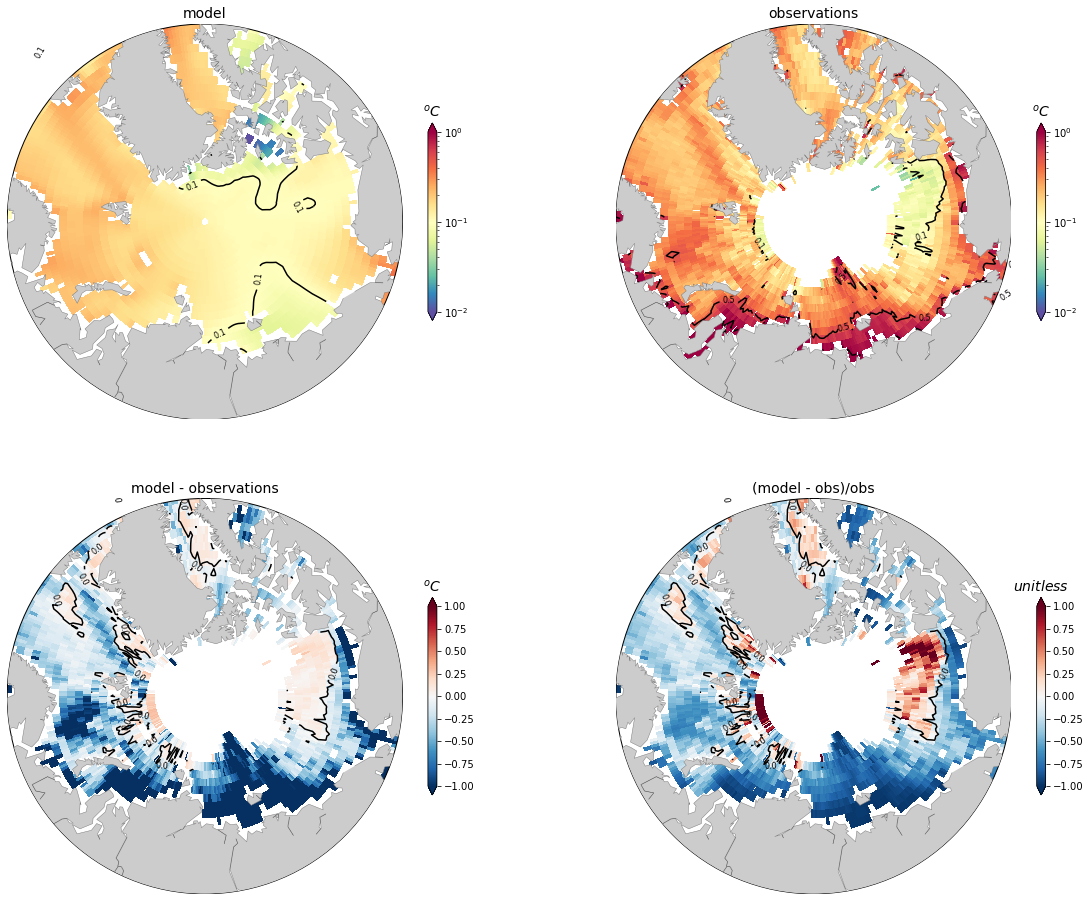

In [19]:
fig = plt.figure(figsize=(20,16))
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
x, y = m(*np.meshgrid(ds.lon,ds.lat))

# Model
ax = fig.add_subplot(221) 
ax.set_title("model", fontsize =14)
phyto, lon= add_cyclic_point(np.log10(chla_surf_avg_model+1), coord=ds.lon, axis=1)
x, y = m(*np.meshgrid(lon,ds.lat))
cf = m.pcolor(x,y,phyto,cmap='Spectral_r', norm=colors.LogNorm(vmin=0.01, vmax=1))
cs=m.contour(x, y, phyto, levels = [0.01, 0.05, 0.1, 0.5, 1], colors='k')
plt.clabel(cs, fontsize=8, inline=True, fmt='%r',inline_spacing=5);
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)
cbar = plt.colorbar(cf, shrink=0.5,extend='both')
cbar.ax.set_title('$^oC$', fontsize = 14)

# Observations 
ax1 = fig.add_subplot(222) 
ax1.set_title("observations", fontsize =14)
phyto, lon= add_cyclic_point(np.log10(chla_surf_avg_obs+1), coord=ds.lon, axis=1)
x, y = m(*np.meshgrid(lon,ds.lat))
cf = m.pcolor(x,y,phyto,cmap='Spectral_r', norm=colors.LogNorm(vmin=0.01, vmax=1))
cs=m.contour(x, y, phyto, levels = [0.01, 0.05, 0.1, 0.5, 1],colors='k')
plt.clabel(cs, fontsize=8, inline=True, fmt='%r',inline_spacing=5);
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)
cbar = plt.colorbar(cf, shrink=0.5,extend='both')
cbar.ax.set_title('$^oC$', fontsize = 14)

# model - observations 
ax2 = fig.add_subplot(223) 
ax2.set_title("model - observations", fontsize =14)
phyto, lon= add_cyclic_point(chla_diff, coord=ds.lon, axis=1)
x, y = m(*np.meshgrid(lon,ds.lat))
cf = m.pcolor(x,y,phyto,cmap='RdBu_r', vmin = -1, vmax = 1)
cs=m.contour(x, y, phyto, levels =[0],colors='k', vmin =0, vmax=1)
plt.clabel(cs, fontsize=8, inline=True, fmt='%r',inline_spacing=5);
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)
cbar = plt.colorbar(cf, shrink=0.5,extend='both')
cbar.ax.set_title('$^oC$', fontsize = 14)

# model - observations / observations  
ax3 = fig.add_subplot(224) 
ax3.set_title("(model - obs)/obs", fontsize =14)
phyto, lon= add_cyclic_point(chla_diff_norm, coord=ds.lon, axis=1)
x, y = m(*np.meshgrid(lon,ds.lat))
cf = m.pcolor(x,y,phyto,cmap='RdBu_r', vmin = -1, vmax = 1)
cs=m.contour(x, y, phyto, levels =[0], colors='k', vmin =0, vmax=1)
plt.clabel(cs, fontsize=8, inline=True, fmt='%r',inline_spacing=5);
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)
cbar = plt.colorbar(cf, shrink=0.5,extend='both')
cbar.ax.set_title('$unitless$', fontsize = 14)

m.plot
plt.show()

fig.savefig('chla_ao_comparison.png', dpi=600, bbox_inches='tight')